<a href="https://colab.research.google.com/github/ranitha84/opencv-tesseract/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,373 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!pip install transformers
!pip install pytesseract
!pip install pillow
!pip install PyMuPDF 

!pip install pdf2image
!apt-get install poppler-utils 
!pip install tesseract

!pip install opencv-python
!pip install opencv-contrib-python


     |████████████████████████████████| 2.8 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 42.5 MB/s 
     |████████████████████████████████| 636 kB 59.2 MB/s 
     |████████████████████████████████| 3.3 MB 18.1 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=8fbe9dc9b9b237baea7ec991365c3ff23c0da79227112f6d0ef49f783f53d7c9
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
     |████████████████████████████████| 6.4 MB 1.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 

In [3]:
!pip install tesseract

!pip install tesseract-ocr

  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install for tesseract-ocr ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-l84fmuf6/tesseract-ocr_6cb69d43f3d94db1a48cd4938f89a5be/setup.py'"'"'; __file__='"'"'/tmp/pip-install-l84fmuf6/tesseract-ocr_6cb69d43f3d94db1a48cd4938f89a5be/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2cc69j3x/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/tesseract-ocr Check the logs for full command output.


In [655]:
from collections import namedtuple
import pytesseract
import argparse
import imutils
import cv2

In [656]:
import matplotlib.pyplot as plt

In [657]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [658]:
# import the necessary packages
import numpy as np
import imutils
import cv2
from matplotlib.pyplot import imshow
def align_images(image, template, maxFeatures=500, keepPercent=0.2,
	debug=False):
	# convert both the input image and template to grayscale
 
  imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
  # use ORB to detect keypoints and extract (binary) local
  # invariant features
  orb = cv2.ORB_create(maxFeatures)
  (kpsA, descsA) = orb.detectAndCompute(imageGray, None)
  (kpsB, descsB) = orb.detectAndCompute(templateGray, None)
  # match the features
  method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
  matcher = cv2.DescriptorMatcher_create(method)
  matches = matcher.match(descsA, descsB, None)
  # sort the matches by their distance (the smaller the distance,
  # the "more similar" the features are)
  matches = sorted(matches, key=lambda x:x.distance)
  # keep only the top matches
  keep = int(len(matches) * keepPercent)
  matches = matches[:keep]
  # check to see if we should visualize the matched keypoints
  if debug:
    matchedVis = cv2.drawMatches(sample_image, kpsA, template_image, kpsB,matches, None)
    matchedVis = imutils.resize(matchedVis, width=1000)
    imshow("Matched Keypoints", matchedVis)
    cv2.waitKey(0)

  # allocate memory for the keypoints (x, y)-coordinates from the
	# top matches -- we'll use these coordinates to compute our
	# homography matrix
  ptsA = np.zeros((len(matches), 2), dtype="float")
  ptsB = np.zeros((len(matches), 2), dtype="float")
  # loop over the top matches
  for (i, m) in enumerate(matches):
    # indicate that the two keypoints in the respective images
    # map to each other
    ptsA[i] = kpsA[m.queryIdx].pt
    ptsB[i] = kpsB[m.trainIdx].pt
  # compute the homography matrix between the two sets of matched points
  (H, mask) = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)
  # use the homography matrix to align the images
  (h, w) = template.shape[:2]
  aligned = cv2.warpPerspective(image, H, (w, h))
  # return the aligned image
  return aligned

In [688]:
template= cv2.imread('/content/fw9_format.png')
image= cv2.imread('/content/fw9_format_1.png')

In [689]:
aligned = align_images(image, template, debug=False)

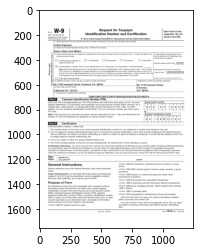

In [690]:
imshow(aligned)

In [691]:
def cleanup_text(text, id):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV

  text = "".join([c if ord(c) < 128 else "" for c in text]).strip()

  stop_words = set(stopwords.words('english'))
 
  word_tokens = word_tokenize(text)
 
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
  filtered_sentence = []
  exclude = set(string.punctuation)

  for w in word_tokens:
    if w not in stop_words:
        s = ''.join(ch for ch in w if ch not in exclude)

        filtered_sentence.append(s)
 
  cleaned_text = " ".join([s for s in filtered_sentence])
  if( id == 'social_security_number' or id =='employee_ein'):
    cleaned_text = cleaned_text.replace("[^0-9]+", " ");

  return cleaned_text

In [692]:
# resize both the aligned and template images so we can easily
# visualize them on our screen
aligned = imutils.resize(aligned, width=700)
template = imutils.resize(template, width=700)
# our first output visualization of the image alignment will be a
# side-by-side comparison of the output aligned image and the
# template
stacked = np.hstack([aligned, template])

In [693]:
# our second image alignment visualization will be *overlaying* the
# aligned image on the template, that way we can obtain an idea of
# how good our image alignment is
overlay = template.copy()
output = aligned.copy()
cv2.addWeighted(overlay, 0.5, output, 0.5, 0, output)
# show the two output image alignment visualizations


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

<Figure size 3600x3600 with 0 Axes>

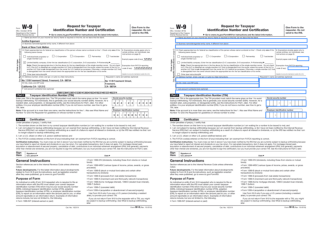

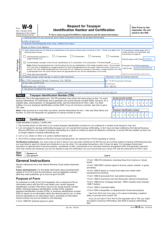

-1

In [694]:
plt.figure(figsize=(50,50))

fig, ax = plt.subplots()
ax.imshow(stacked)
ax.axis('off')  # clear x-axis and y-axis

fig, ax = plt.subplots()
ax.imshow(output)
ax.axis('off')

plt.show()
cv2.waitKey(0)

In [695]:
OCRLocation = namedtuple("OCRLocation", ["id", "bbox",
	"filter_keywords"])
# define the locations of each area of the document we wish to OCR
OCR_LOCATIONS = [
	OCRLocation("name", (70, 145, 1059, 20),
		["required", "line", "blank", "name", "shown", "leave", "as"]),
	OCRLocation("business_name", (70, 175, 1059, 20),
		["business", "name", "disregarded", "entity", "if", "different" , "from", "above"]),
	OCRLocation("exempt_payee_code", (620, 230, 247, 20),
		["exempt", "payee", "code", "if" , "any"]),
	OCRLocation("exempt_fatca_code", (578, 275, 247, 20),
		["exemption", "from", "fatca", "reporting" ,"code", "if", "any"]),
	OCRLocation("address", (65, 325, 375, 20),
		["address", "instructions", "see"]),
	OCRLocation("city_state_zip", (65, 360, 375, 10),
		["city", "zip", "town", "state"]),
	OCRLocation("requesters_name_address", (445, 325, 390, 60),
		["employee", "signature", "form", "valid", "unless",
		 	"you", "sign"]),
	OCRLocation("account_numbers", (70, 378, 1059, 20),
		["list", "account", "number(s)", "here", "(optional)"]),
	OCRLocation("social_security_number", (465, 420, 390, 30),
		["list", "account", "number(s)", "here", "(optional)"]),
	OCRLocation("employee_ein", (465, 485, 390, 30),
		["employer", "identification", "number", "ein"]),
]



In [696]:
import cv2
import numpy as np
from PIL import Image
import tempfile

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(image):
    # TODO : Implement using opencv
    temp_filename = set_image_dpi(image)
    im_new = image_smoothening(temp_filename)
    return im_new

def set_image_dpi(image):
    im = Image.fromarray(image)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = 2 * length_x, 2 * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
    temp_filename = temp_file.name
    im_resized.save(temp_filename, dpi=(150, 150))
    return temp_filename

def image_smoothening(file_name):
    img = cv2.imread(file_name, 0)
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

[INFO] OCR'ing document...
name
Anitha Rajamani

business_name
Bank of Now York Mallon

exempt_payee_code
121242

exempt_fatca_code
I212121 2121212

address
No 174 Freemont Steet, Freenont, CA- 98754

city_state_zip
California CA- 121212

requesters_name_address
No 174 Freemont Street,
Freenont
CA- 98754

account_numbers
23897 23847 2387 47 2387 47 25347 82347 237 487 237 4823974

social_security_number
 

3) 2) 4] -| 2] 3] -| 2) 3) 4) 8

employee_ein
3] 4) -| 3) 9) 8) 5) 7] 3) 4



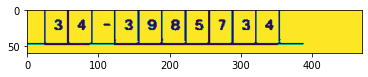

In [697]:
# initialize a results list to store the document OCR parsing results
print("[INFO] OCR'ing document...")
parsingResults = []
# loop over the locations of the document we are going to OCR
i = 0 
text = ''
for loc in OCR_LOCATIONS:
  (x,y,w,h) = loc.bbox
  print(loc.id)
  # extract the OCR ROI from the aligned image
  roi= aligned[y:y+h, x:x+w]
  #print(roi)
  if(len(roi)>0 and len(roi[0])>0):
    # OCR the ROI using Tesseract
    processed_image = process_image_for_ocr(roi)
    imshow(processed_image)

    if (loc.id=='social_security_number' or  loc.id =='employee_ein'):
      custom_config = 'digits --oem 3 --psm 6 -c tessedit_char_whitelist=0123456789'
    else:
      custom_config = '-l eng --oem 3 --psm 6'
    text = pytesseract.image_to_string(processed_image, config=custom_config)
    print(text)
    #text = pytesseract.image_to_string(rgb)
    # break the text into lines and loop over them
    for line in text.split("\n"):
      # if the line is empty, ignore it
      if len(line) == 0:
        continue
      # convert the line to lowercase and then check to see if the
      # line contains any of the filter keywords (these keywords
      # are part of the *form itself* and should be ignored)
      lower = line.lower()
      count = sum([lower.count(x) for x in loc.filter_keywords])
      # if the count is zero then we know we are *not* examining a
      # text field that is part of the document itself (ex., info,
      # on the field, an example, help text, etc.)
      if count == 0:
        # update our parsing results dictionary with the OCR'd
        # text if the line is *not* empty
        parsingResults.append((loc, line))

In [698]:
print(parsingResults)

[(OCRLocation(id='name', bbox=(70, 145, 1059, 20), filter_keywords=['required', 'line', 'blank', 'name', 'shown', 'leave', 'as']), 'Anitha Rajamani'), (OCRLocation(id='name', bbox=(70, 145, 1059, 20), filter_keywords=['required', 'line', 'blank', 'name', 'shown', 'leave', 'as']), '\x0c'), (OCRLocation(id='business_name', bbox=(70, 175, 1059, 20), filter_keywords=['business', 'name', 'disregarded', 'entity', 'if', 'different', 'from', 'above']), 'Bank of Now York Mallon'), (OCRLocation(id='business_name', bbox=(70, 175, 1059, 20), filter_keywords=['business', 'name', 'disregarded', 'entity', 'if', 'different', 'from', 'above']), '\x0c'), (OCRLocation(id='exempt_payee_code', bbox=(620, 230, 247, 20), filter_keywords=['exempt', 'payee', 'code', 'if', 'any']), '121242'), (OCRLocation(id='exempt_payee_code', bbox=(620, 230, 247, 20), filter_keywords=['exempt', 'payee', 'code', 'if', 'any']), '\x0c'), (OCRLocation(id='exempt_fatca_code', bbox=(578, 275, 247, 20), filter_keywords=['exemption'

In [699]:
# initialize a dictionary to store our final OCR results
results = {}
# loop over the results of parsing the document
for (loc, line) in parsingResults:
	# grab any existing OCR result for the current ID of the document
	r = results.get(loc.id, None)
	# if the result is None, initialize it using the text and location
	# namedtuple (converting it to a dictionary as namedtuples are not
	# hashable)
	if r is None:
		results[loc.id] = (line, loc._asdict())
	# otherwise, there exists an OCR result for the current area of the
	# document, so we should append our existing line
	else:
		# unpack the existing OCR result and append the line to the
		# existing text
		(existingText, loc) = r
		text = "{}\n{}".format(existingText, line)
		# update our results dictionary
		results[loc["id"]] = (text, loc)

In [700]:
# loop over the results
for (locID, result) in results.items():
	# unpack the result tuple
  (text, loc) = result
  # display the OCR result to our terminal
  print(loc["id"])
  print("=" * len(loc["id"]))
  # extract the bounding box coordinates of the OCR location and
  # then strip out non-ASCII text so we can draw the text on the
  # output image using OpenCV
  (x, y, w, h) = loc["bbox"]
  clean = cleanup_text(text,loc["id"])
  print("{}\n\n".format(clean))
  # draw a bounding box around the text
  cv2.rectangle(aligned, (x, y), (x + w, y + h), (0, 255, 0), 2)
  # loop over all lines in the text
  for (i, line) in enumerate(text.split("\n")):
    # draw the line on the output image
    startY = y + (i * 70) + 40
    cv2.putText(aligned, line, (x, startY),
                cv2.FONT_HERSHEY_SIMPLEX, 1.8, (0, 0, 255), 2)

name
====
Anitha Rajamani


business_name
Bank Now York Mallon


exempt_payee_code
121242


exempt_fatca_code
I212121 2121212


address
No 174 Freemont Steet  Freenont  CA 98754


city_state_zip
California CA 121212


requesters_name_address
No 174 Freemont Street  Freenont CA 98754


account_numbers
23897 23847 2387 47 2387 47 25347 82347 237 487 237 4823974


social_security_number
3  2  4   2  3   2  3  4  8


employee_ein
3  4   3  9  8  5  7  3  4




-1

<Figure size 1440x1440 with 0 Axes>

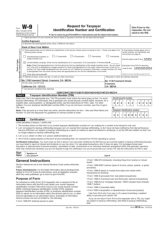

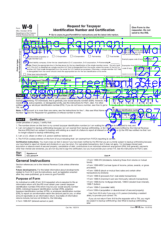

In [701]:
# show the input and output images, resizing it such that they fit
# on our screen
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
imshow(imutils.resize(image, width=1000))
ax.axis('off')

fig, ax = plt.subplots()
imshow(imutils.resize(aligned, width=1000))
ax.axis('off')

cv2.waitKey(0)

In [702]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2TokenizerFast, LayoutLMv2Processor

feature_extractor = LayoutLMv2FeatureExtractor() # apply_ocr is set to True by default
tokenizer = LayoutLMv2TokenizerFast.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [703]:
from transformers import LayoutLMv2Processor
from PIL import Image

processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased")

encoding = processor(image, return_tensors="pt") # you can also add all tokenizer parameters here such as padding, truncation
print(encoding.keys())
# dict_keys(['input_ids',

Downloading:   0%|          | 0.00/135 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1351 > 512). Running this sequence through the model will result in indexing errors


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox', 'image'])


In [ ]:
from transformers import LayoutLMv2Processor
from PIL import Image

processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased")

question = "Name (as shown on your income tax return). Name is required on this line; do not leave this line blank."
encoding = processor(image, question, return_tensors="pt")
print(encoding.keys())

Token indices sequence length is longer than the specified maximum sequence length for this model (1335 > 512). Running this sequence through the model will result in indexing errors


dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'bbox', 'image'])


In [ ]:
print(encoding.values())

dict_values([tensor([[ 101, 2171, 1006,  ..., 2760, 1007,  102]]), tensor([[0, 0, 0,  ..., 1, 1, 1]]), tensor([[1, 1, 1,  ..., 1, 1, 1]]), tensor([[[   0,    0,    0,    0],
         [   0,    0,    0,    0],
         [   0,    0,    0,    0],
         ...,
         [ 895,  920,  940,  928],
         [ 895,  920,  940,  928],
         [1000, 1000, 1000, 1000]]]), tensor([[[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],

         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],

         [[255, 255, 255

In [704]:
from transformers import LayoutLMv2FeatureExtractor

In [705]:
feature_extractor = LayoutLMv2FeatureExtractor()
encoding = feature_extractor(image, return_tensors="pt")
print(encoding.keys())

dict_keys(['pixel_values', 'words', 'boxes'])


In [706]:
%cd /content/
# install detectron2:
!git clone https://github.com/facebookresearch/detectron2
%cd /content/detectron2
!pip install -r requirements.txt
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git

/content
Cloning into 'detectron2'...
remote: Enumerating objects: 13028, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 13028 (delta 307), reused 436 (delta 270), pack-reused 12499
Receiving objects: 100% (13028/13028), 5.59 MiB | 18.45 MiB/s, done.
Resolving deltas: 100% (9255/9255), done.
/content/detectron2
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running install
running bdist_egg
running egg_info
creating detectron2.egg-info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
writing manifest file 'detectron2.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:370: UserWarning: Attempted to

In [ ]:
from transformers import LayoutLMv2Processor, LayoutLMv2ForQuestionAnswering
from PIL import Image
import torch

processor = LayoutLMv2Processor.from_pretrained('microsoft/layoutlmv2-base-uncased')
model = LayoutLMv2ForQuestionAnswering.from_pretrained('microsoft/layoutlmv2-base-uncased')

encoding = processor(image, question, return_tensors="pt")
start_positions = torch.tensor([1])
end_positions = torch.tensor([3])

outputs = model(**encoding, start_positions=start_positions, end_positions=end_positions)
loss = outputs.loss
start_scores = outputs.start_logits
end_scores = outputs.end_logits


Some weights of the model checkpoint at microsoft/layoutlmv2-base-uncased were not used when initializing LayoutLMv2ForQuestionAnswering: ['layoutlmv2.visual.backbone.bottom_up.res4.7.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.3.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.17.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.18.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.20.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.1.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.21.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res2.1.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.19.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.2.conv2.norm.num_batches_tracked'

RuntimeError: ignored